## Import the libraries

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

## Load the data

In [2]:
data = pd.read_csv('Market Segmentation.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

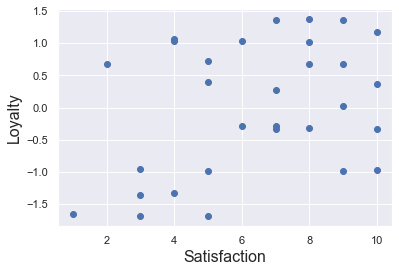

In [13]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction', size = 16)
plt.ylabel('Loyalty', size = 16)
plt.show()

## Select the features

In [14]:
x = data.copy()

## Clustering

In [15]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [17]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
clusters

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


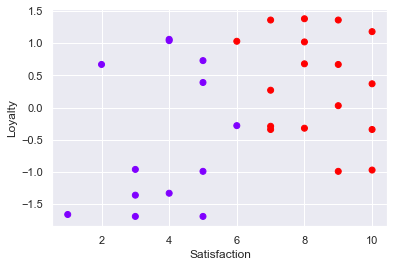

In [18]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c = clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel('Loyalty')
plt.show()

#### Most probably the algorithm only considered "Satisfaction" as a feature

## Standardize the variables to solve the upon-mentioned problem

In [22]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Elbow Method

In [27]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\alexm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.571285077136385,
 5.326631124753926,
 4.380320178840312,
 3.860881437312899]

## Plotting WCSS

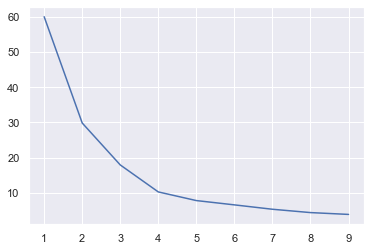

In [29]:
plt.plot(range(1,10), wcss)

## Exploring clustering solutions and selecting the number of clusters

In [34]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,3
9,8,0.68,3


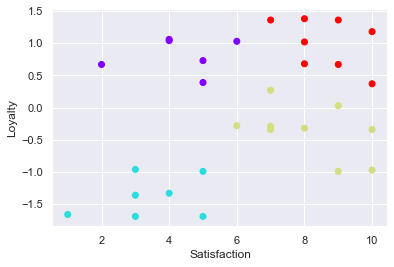

In [35]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel('Loyalty')
plt.show()